Import Libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from kagglehub import dataset_download
import matplotlib.pyplot as plt

Download and Load Dataset

In [3]:
path = dataset_download("camnugent/california-housing-prices")

df = pd.read_csv(f"{path}/housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data Preprocessing

In [6]:
# Drop rows with missing values
df.dropna(inplace=True)

# Handle categorical columns (e.g., 'ocean_proximity') using one-hot encoding
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

# Define input features (X) and target (y)
X = df.drop(columns=["median_house_value"])
y = (df["median_house_value"] > df["median_house_value"].median()).astype(int)

# Display the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (20433, 12)
Shape of y: (20433,)


Feature Scaling

In [7]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[-1.32731375  1.05171726  0.98216331 -0.8038126  -0.97032521 -0.97331952
  -0.97683327  2.34516291 -0.68271329 -0.01564487  2.82866074 -0.38418614]
 [-1.32232256  1.04235526 -0.60621017  2.0421302   1.34827594  0.86133924
   1.67037262  2.33263161 -0.68271329 -0.01564487  2.82866074 -0.38418614]
 [-1.33230494  1.03767426  1.85576873 -0.53518928 -0.82556097 -0.81976943
  -0.84342665  1.78293943 -0.68271329 -0.01564487  2.82866074 -0.38418614]
 [-1.33729614  1.03767426  1.85576873 -0.62351007 -0.71876767 -0.76505618
  -0.73356237  0.93297    -0.68271329 -0.01564487  2.82866074 -0.38418614]
 [-1.33729614  1.03767426  1.85576873 -0.46196998 -0.61197437 -0.75887888
  -0.62892973 -0.01314291 -0.68271329 -0.01564487  2.82866074 -0.38418614]]


Generate Polynomial Features

In [8]:
# Generate polynomial features of degree 2
degree = 2
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X_scaled)

Shape of polynomial features: (20433, 91)


Initialize Model Parameters

In [9]:
# Initialize weights (theta) to zeros
m, n = X_poly.shape
theta = np.zeros(n)

# Display the shape of theta
print("Shape of theta:", theta.shape)

Shape of theta: (91,)


Define Helper Functions

In [10]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function for logistic regression
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        theta -= (alpha / m) * X.T @ (sigmoid(X @ theta) - y)
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

Train the Model

In [11]:
#hyperparameters
alpha = 0.01  # Learning rate
iterations = 1000

# Train the model using gradient descent
theta, cost_history = gradient_descent(X_poly, y, theta, alpha, iterations)

print("Final cost:", cost_history[-1])

Final cost: 0.40791707757355006


Make Predictions

In [12]:
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Make predictions on the training data
y_pred = predict(X_poly, theta)

print("First 10 predictions:", y_pred[:10])

First 10 predictions: [1 1 1 1 1 1 1 1 1 1]


Evaluate Model Accuracy

In [13]:

accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy:.4f}")

Training Accuracy: 0.8245


The training accuracy is 82.45%, which is decent for a logistic regression model


Plot Cost History

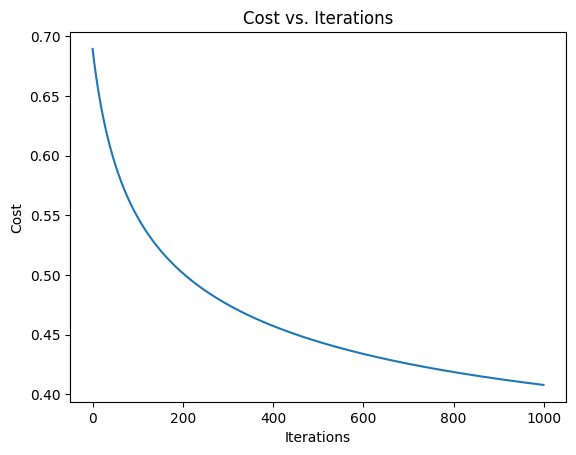

In [14]:

plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()

The cost function is steadily decreasing over the iterations, which is a good sign that gradient descent is working correctly. The curve follows a typical exponential decay shape, meaning the model is converging. However, the cost is still decreasing